In [1]:
import warnings
import torch
import torch.utils.data
import torchvision
import cv2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.nn as nn


from torchvision import transforms
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
from tqdm import tqdm

from pathlib import Path

from PIL import Image, ImageOps

In [2]:
BATCH_SIZE = 256
EPOCHS = 32

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
desired_size = (224, 224)

In [4]:
# the training transforms
train_transform = transforms.Compose([
    transforms.Resize(desired_size),
    transforms.Grayscale(1)
    
])


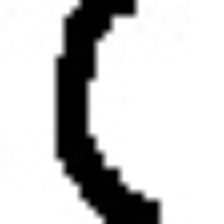

In [5]:
dataset = torchvision.datasets.ImageFolder('F:\my_programs\python\image_recognition\\all_dataset224', transform=train_transform)
display(dataset[1][0])

In [6]:
classes_dict = dataset.class_to_idx
classes = []
for key in classes_dict.keys():
    classes.append(str(key))
classes.sort()
#classes

In [7]:
# classes = ['!', '(', ')', '+', ',', '-', 
#            '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 
#            'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R', 'S', 'T', 'X', '[', ']', 
#            'alpha', 'ascii_124', 'b', 'beta', 'chi', 'cos', 'd', 'div', 'e', 'exists', 
#            'f', 'forall', 'forward_slash', 'gamma', 'geq', 'greater', 'gt', 
#            'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 
#            'lim', 'log', 'lt', 'mu', 'neq', 'o', 'omega', 'p', 'phi', 'pi', 'pm', 'prime', 
#            'q', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', 
#            'u', 'upsilon', 'v', 'w', 'y', 'z', '{', '}']

NUM_CLASSES = len(classes)

def map_pred(ind):
    if ind < NUM_CLASSES:
        return classes[ind]
    return 'ERROR MAPPIMG'
NUM_CLASSES

40

In [8]:
train_loader = torch.utils.data.DataLoader(
    dataset, batch_size=BATCH_SIZE, shuffle=False,
    num_workers=6, pin_memory=True
)


In [56]:
def resize():
    path = "images_resized_to"+str(desired_size[0])+"/"
    counter = 0
    for p in tqdm(dataset, total=int(len(dataset))):
        true_name = map_pred(p[1])
        Path(path + true_name).mkdir(parents=True, exist_ok=True)
        
        #image = np.array(p[0])
        #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        #thresh = 250
        #ret, thresh_img = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)
        #img_erode = cv2.erode(thresh_img, np.ones((3, 3), np.uint8), iterations=1)
        
        #cv2.imwrite(path + true_name + '/' + str(counter)+'.jpg', img_erode)
        #rotated.save(path + true_name + '/' + str(counter)+'.jpg')
        train_transform(p[0]).save(path + true_name +'/' + str(counter)+'.jpg')
        counter+=1


In [57]:
#resize()

100%|█████████████████████████████████████████████████████████████████████████| 338220/338220 [20:24<00:00, 276.17it/s]


In [10]:
def dummy():
    counter = 0
    true_name = ''
    classes = []
    for p in dataset:
        #print(p)
        true_name1 = str(p[1])#map_pred(p[1])
        if true_name != true_name1:
            true_name = true_name1
            classes.append(true_name)
            Path("dummy"+str(desired_size[0])+"/"+true_name).mkdir(parents=True, exist_ok=True)
            p[0].save("dummy"+str(desired_size[0])+"/" + true_name + '/' + str(counter)+'.jpg')
            
        if counter % 1000 == 0:
            print(len(dataset)-counter)
        #Path("new/"+str(p[1])).mkdir(parents=True, exist_ok=True)
        #torch.save(p[0], 'new/'+str(p[1]) + str(counter)+'.jpg')
        counter+=1
    print(classes)
    return classes

In [9]:
def add_contrast(x, factor):
    return transforms.functional.adjust_contrast(x, factor)

In [11]:
def contrast():
    path = "images_contrast_to"+str(desired_size[0])+"/"
    counter = 0
    for p in tqdm(dataset, total=int(len(dataset))):
        true_name = map_pred(p[1])
        Path(path + true_name).mkdir(parents=True, exist_ok=True)
        
        #display(p[0])
        image = add_contrast(p[0], 3)
        
        #display(image)
        
        image.save(path + true_name + '/' + str(counter)+'.jpg')
#         Path("new/"+str(p[1])).mkdir(parents=True, exist_ok=True)
#         torch.save(p[0], 'new/'+str(p[1]) + str(counter)+'.jpg')
        counter+=1

In [12]:
contrast()

  0%|                                                                             | 6/338219 [00:00<1:46:43, 52.82it/s]

338219


  0%|▏                                                                          | 1041/338219 [00:04<16:34, 338.97it/s]

337219


  1%|▍                                                                          | 2066/338219 [00:07<15:08, 370.10it/s]

336219


  1%|▋                                                                          | 3045/338219 [00:10<31:39, 176.50it/s]

335219


  1%|▉                                                                          | 4032/338219 [00:14<19:25, 286.62it/s]

334219


  1%|█                                                                          | 5037/338219 [00:17<21:44, 255.35it/s]

333219


  2%|█▎                                                                         | 6017/338219 [00:22<25:50, 214.23it/s]

332219


  2%|█▌                                                                         | 7036/338219 [00:26<21:53, 252.17it/s]

331219


  2%|█▊                                                                         | 8034/338219 [00:30<18:49, 292.38it/s]

330219


  3%|██                                                                         | 9034/338219 [00:34<21:27, 255.75it/s]

329219


  3%|██▏                                                                       | 10013/338219 [00:38<48:55, 111.81it/s]

328219


  3%|██▍                                                                       | 11018/338219 [00:42<20:05, 271.48it/s]

327219


  4%|██▋                                                                       | 12052/338219 [00:46<20:48, 261.34it/s]

326219


  4%|██▊                                                                       | 13037/338219 [00:50<20:48, 260.38it/s]

325219


  4%|███                                                                       | 14029/338219 [00:54<20:56, 258.02it/s]

324219


  4%|███▎                                                                      | 15047/338219 [00:59<21:55, 245.72it/s]

323219


  5%|███▌                                                                      | 16045/338219 [01:03<22:31, 238.32it/s]

322219


  5%|███▋                                                                      | 17037/338219 [01:07<22:51, 234.12it/s]

321219


  5%|███▉                                                                      | 18036/338219 [01:12<23:01, 231.77it/s]

320219


  6%|████▏                                                                     | 19039/338219 [01:15<20:35, 258.25it/s]

319219


  6%|████▍                                                                     | 20084/338219 [01:19<13:56, 380.25it/s]

318219


  6%|████▌                                                                     | 21048/338219 [01:21<14:17, 369.69it/s]

317219


  7%|████▊                                                                     | 22038/338219 [01:24<15:32, 339.12it/s]

316219


  7%|█████                                                                     | 23047/338219 [01:27<16:57, 309.70it/s]

315219


  7%|█████▎                                                                    | 24053/338219 [01:30<17:10, 304.82it/s]

314219


  7%|█████▍                                                                    | 24983/338219 [01:33<16:01, 325.86it/s]

313219


  8%|█████▋                                                                    | 26051/338219 [01:37<19:28, 267.16it/s]

312219


  8%|█████▉                                                                    | 27036/338219 [01:41<17:03, 303.93it/s]

311219


  8%|██████▏                                                                   | 28045/338219 [01:44<18:23, 281.14it/s]

310219


  9%|██████▎                                                                   | 29031/338219 [01:48<20:26, 252.15it/s]

309219


  9%|██████▌                                                                   | 30020/338219 [01:52<20:05, 255.68it/s]

308219


  9%|██████▊                                                                   | 31045/338219 [01:56<22:05, 231.77it/s]

307219


  9%|███████                                                                   | 32029/338219 [02:00<20:03, 254.45it/s]

306219


 10%|███████▏                                                                  | 33035/338219 [02:04<21:39, 234.83it/s]

305219


 10%|███████▍                                                                  | 34047/338219 [02:08<17:55, 282.93it/s]

304219


 10%|███████▋                                                                  | 35045/338219 [02:12<18:50, 268.19it/s]

303219


 11%|███████▉                                                                  | 36048/338219 [02:16<20:32, 245.23it/s]

302219


 11%|████████                                                                  | 37044/338219 [02:20<19:47, 253.64it/s]

301219


 11%|████████▎                                                                 | 38072/338219 [02:24<14:10, 353.00it/s]

300219


 12%|████████▌                                                                 | 39078/338219 [02:27<11:40, 426.83it/s]

299219


 12%|████████▊                                                                 | 40022/338219 [02:29<11:46, 422.17it/s]

298219


 12%|████████▉                                                                 | 41043/338219 [02:33<18:43, 264.40it/s]

297219


 12%|█████████▏                                                                | 42046/338219 [02:36<17:30, 281.86it/s]

296219


 13%|█████████▍                                                                | 43047/338219 [02:40<14:43, 334.10it/s]

295219


 13%|█████████▋                                                                | 44060/338219 [02:43<14:25, 339.79it/s]

294219


 13%|█████████▊                                                                | 45013/338219 [02:46<15:18, 319.18it/s]

293219


 14%|██████████                                                                | 46042/338219 [02:50<18:11, 267.71it/s]

292219


 14%|██████████▎                                                               | 47042/338219 [02:54<17:38, 275.06it/s]

291219


 14%|██████████▌                                                               | 48032/338219 [02:57<15:59, 302.34it/s]

290219


 15%|██████████▋                                                               | 49056/338219 [03:01<17:12, 280.09it/s]

289219


 15%|██████████▉                                                               | 50026/338219 [03:04<16:56, 283.38it/s]

288219


 15%|███████████▏                                                              | 51061/338219 [03:07<14:31, 329.33it/s]

287219


 15%|███████████▍                                                              | 52064/338219 [03:10<13:18, 358.19it/s]

286219


 16%|███████████▌                                                              | 53049/338219 [03:13<13:56, 341.10it/s]

285219


 16%|███████████▊                                                              | 54049/338219 [03:16<14:24, 328.84it/s]

284219


 16%|████████████                                                              | 55041/338219 [03:19<12:38, 373.17it/s]

283219


 17%|████████████▎                                                             | 56033/338219 [03:22<18:43, 251.25it/s]

282219


 17%|████████████▍                                                             | 57038/338219 [03:26<18:51, 248.53it/s]

281219


 17%|████████████▋                                                             | 58030/338219 [03:31<19:01, 245.55it/s]

280219


 17%|████████████▉                                                             | 59024/338219 [03:35<18:38, 249.67it/s]

279219


 18%|█████████████▏                                                            | 60040/338219 [03:39<20:48, 222.82it/s]

278219


 18%|█████████████▎                                                            | 61047/338219 [03:44<18:29, 249.73it/s]

277219


 18%|█████████████▌                                                            | 62034/338219 [03:48<16:02, 287.02it/s]

276219


 19%|█████████████▊                                                            | 63045/338219 [03:52<19:06, 240.07it/s]

275219


 19%|██████████████                                                            | 64045/338219 [03:56<15:20, 297.79it/s]

274219


 19%|██████████████▏                                                           | 65036/338219 [03:58<12:58, 350.74it/s]

273219


 20%|██████████████▍                                                           | 66037/338219 [04:01<14:42, 308.49it/s]

272219


 20%|██████████████▋                                                           | 67030/338219 [04:04<13:51, 326.32it/s]

271219


 20%|██████████████▉                                                           | 68029/338219 [04:08<17:43, 254.02it/s]

270219


 20%|███████████████                                                           | 69027/338219 [04:11<18:21, 244.42it/s]

269219


 21%|███████████████▎                                                          | 70050/338219 [04:15<16:02, 278.65it/s]

268219


 21%|███████████████▌                                                          | 71048/338219 [04:19<16:53, 263.65it/s]

267219


 21%|███████████████▊                                                          | 72045/338219 [04:23<18:27, 240.27it/s]

266219


 22%|███████████████▉                                                          | 73032/338219 [04:27<20:50, 211.99it/s]

265219


 22%|████████████████▏                                                         | 74028/338219 [04:31<15:19, 287.46it/s]

264219


 22%|████████████████▍                                                         | 75027/338219 [04:35<17:19, 253.11it/s]

263219


 22%|████████████████▋                                                         | 76007/338219 [04:38<16:39, 262.25it/s]

262219


 23%|████████████████▊                                                         | 77037/338219 [04:41<11:54, 365.32it/s]

261219


 23%|█████████████████                                                         | 78052/338219 [04:45<14:21, 302.11it/s]

260219


 23%|█████████████████▎                                                        | 79053/338219 [04:47<10:25, 414.01it/s]

259219


 24%|█████████████████▌                                                        | 80069/338219 [04:50<12:29, 344.35it/s]

258219


 24%|█████████████████▋                                                        | 81034/338219 [04:53<15:49, 270.94it/s]

257219


 24%|█████████████████▉                                                        | 82032/338219 [04:56<12:26, 343.38it/s]

256219


 25%|██████████████████▏                                                       | 83038/338219 [05:00<14:44, 288.37it/s]

255219


 25%|██████████████████▍                                                       | 84032/338219 [05:04<16:25, 257.82it/s]

254219


 25%|██████████████████▌                                                       | 85039/338219 [05:08<15:08, 278.66it/s]

253219


 25%|██████████████████▊                                                       | 86041/338219 [05:12<20:36, 203.90it/s]

252219


 26%|███████████████████                                                       | 87037/338219 [05:16<17:48, 235.06it/s]

251219


 26%|███████████████████▎                                                      | 88049/338219 [05:20<14:45, 282.57it/s]

250219


 26%|███████████████████▍                                                      | 89036/338219 [05:24<18:41, 222.27it/s]

249219


 27%|███████████████████▋                                                      | 90045/338219 [05:28<16:15, 254.46it/s]

248219


 27%|███████████████████▉                                                      | 91038/338219 [05:32<15:59, 257.62it/s]

247219


 27%|████████████████████▏                                                     | 92034/338219 [05:36<15:19, 267.80it/s]

246219


 28%|████████████████████▎                                                     | 93033/338219 [05:40<15:36, 261.69it/s]

245219


 28%|████████████████████▌                                                     | 94032/338219 [05:44<16:49, 241.77it/s]

244219


 28%|████████████████████▊                                                     | 95052/338219 [05:48<11:54, 340.48it/s]

243219


 28%|█████████████████████                                                     | 96058/338219 [05:52<14:30, 278.13it/s]

242219


 29%|█████████████████████▏                                                    | 97021/338219 [05:55<19:55, 201.68it/s]

241219


 29%|█████████████████████▍                                                    | 98023/338219 [06:00<18:32, 215.88it/s]

240219


 29%|█████████████████████▋                                                    | 99065/338219 [06:04<12:39, 314.93it/s]

239219


 30%|█████████████████████▌                                                   | 100049/338219 [06:08<13:56, 284.67it/s]

238219


 30%|█████████████████████▊                                                   | 101061/338219 [06:11<12:15, 322.29it/s]

237219


 30%|██████████████████████                                                   | 102050/338219 [06:14<22:22, 175.97it/s]

236219


 30%|██████████████████████▏                                                  | 103053/338219 [06:17<12:40, 309.40it/s]

235219


 31%|██████████████████████▍                                                  | 104059/338219 [06:21<12:10, 320.49it/s]

234219


 31%|██████████████████████▋                                                  | 105048/338219 [06:25<13:46, 282.15it/s]

233219


 31%|██████████████████████▉                                                  | 106034/338219 [06:28<14:25, 268.37it/s]

232219


 32%|███████████████████████                                                  | 107055/338219 [06:32<15:44, 244.69it/s]

231219


 32%|███████████████████████▎                                                 | 108030/338219 [06:36<16:24, 233.82it/s]

230219


 32%|███████████████████████▌                                                 | 109034/338219 [06:40<14:43, 259.46it/s]

229219


 33%|███████████████████████▊                                                 | 110040/338219 [06:44<13:20, 284.95it/s]

228219


 33%|███████████████████████▉                                                 | 111045/338219 [06:48<13:46, 275.00it/s]

227219


 33%|████████████████████████▏                                                | 112034/338219 [06:52<14:36, 257.94it/s]

226219


 33%|████████████████████████▍                                                | 113036/338219 [06:55<13:20, 281.26it/s]

225219


 34%|████████████████████████▌                                                | 114039/338219 [06:59<13:52, 269.40it/s]

224219


 34%|████████████████████████▊                                                | 115050/338219 [07:02<10:23, 357.68it/s]

223219


 34%|█████████████████████████                                                | 116067/338219 [07:05<08:54, 415.39it/s]

222219


 35%|█████████████████████████▎                                               | 117057/338219 [07:07<10:52, 339.08it/s]

221219


 35%|█████████████████████████▍                                               | 118063/338219 [07:11<10:50, 338.57it/s]

220219


 35%|█████████████████████████▋                                               | 119033/338219 [07:14<13:11, 277.05it/s]

219219


 35%|█████████████████████████▉                                               | 120028/338219 [07:17<11:28, 317.05it/s]

218219


 36%|██████████████████████████▏                                              | 121062/338219 [07:20<10:13, 353.78it/s]

217219


 36%|██████████████████████████▎                                              | 122053/338219 [07:24<12:42, 283.42it/s]

216219


 36%|██████████████████████████▌                                              | 123030/338219 [07:28<12:03, 297.33it/s]

215219


 37%|██████████████████████████▊                                              | 124049/338219 [07:31<11:55, 299.51it/s]

214219


 37%|██████████████████████████▉                                              | 125025/338219 [07:35<14:16, 248.99it/s]

213219


 37%|███████████████████████████▏                                             | 126032/338219 [07:39<14:15, 248.02it/s]

212219


 38%|███████████████████████████▍                                             | 127054/338219 [07:43<14:30, 242.66it/s]

211219


 38%|███████████████████████████▋                                             | 128033/338219 [07:46<08:12, 426.34it/s]

210219


 38%|███████████████████████████▊                                             | 129048/338219 [07:49<10:24, 334.68it/s]

209219


 38%|████████████████████████████                                             | 130054/338219 [07:52<09:38, 359.70it/s]

208219


 39%|████████████████████████████▎                                            | 131041/338219 [07:55<12:44, 271.06it/s]

207219


 39%|████████████████████████████▍                                            | 132024/338219 [07:58<11:44, 292.61it/s]

206219


 39%|████████████████████████████▋                                            | 133041/338219 [08:02<13:41, 249.89it/s]

205219


 40%|████████████████████████████▉                                            | 134048/338219 [08:07<14:22, 236.59it/s]

204219


 40%|█████████████████████████████▏                                           | 135055/338219 [08:11<13:42, 247.04it/s]

203219


 40%|█████████████████████████████▎                                           | 136038/338219 [08:15<15:19, 219.91it/s]

202219


 41%|█████████████████████████████▌                                           | 137042/338219 [08:19<13:25, 249.73it/s]

201219


 41%|█████████████████████████████▊                                           | 138061/338219 [08:23<09:27, 352.97it/s]

200219


 41%|██████████████████████████████                                           | 139033/338219 [08:27<13:20, 248.71it/s]

199219


 41%|██████████████████████████████▏                                          | 140062/338219 [08:31<08:11, 403.51it/s]

198219


 42%|██████████████████████████████▍                                          | 141007/338219 [08:33<08:34, 383.48it/s]

197219


 42%|██████████████████████████████▋                                          | 142038/338219 [08:36<09:24, 347.49it/s]

196219


 42%|██████████████████████████████▊                                          | 143047/338219 [08:39<09:40, 336.14it/s]

195219


 43%|███████████████████████████████                                          | 144030/338219 [08:42<13:39, 237.05it/s]

194219


 43%|███████████████████████████████▎                                         | 145039/338219 [08:47<12:51, 250.30it/s]

193219


 43%|███████████████████████████████▌                                         | 146022/338219 [08:51<16:16, 196.89it/s]

192219


 43%|███████████████████████████████▋                                         | 147031/338219 [08:55<10:40, 298.68it/s]

191219


 44%|███████████████████████████████▉                                         | 148047/338219 [08:59<12:07, 261.46it/s]

190219


 44%|████████████████████████████████▏                                        | 149067/338219 [09:01<06:30, 484.44it/s]

189219


 44%|████████████████████████████████▍                                        | 150064/338219 [09:04<08:43, 359.12it/s]

188219


 45%|████████████████████████████████▌                                        | 151064/338219 [09:07<08:42, 358.35it/s]

187219


 45%|████████████████████████████████▊                                        | 152049/338219 [09:10<09:01, 343.81it/s]

186219


 45%|█████████████████████████████████                                        | 153041/338219 [09:14<12:15, 251.61it/s]

185219


 46%|█████████████████████████████████▎                                       | 154054/338219 [09:18<12:09, 252.37it/s]

184219


 46%|█████████████████████████████████▍                                       | 155039/338219 [09:22<12:08, 251.59it/s]

183219


 46%|█████████████████████████████████▋                                       | 156026/338219 [09:27<11:53, 255.32it/s]

182219


 46%|█████████████████████████████████▉                                       | 157037/338219 [09:31<11:56, 252.83it/s]

181219


 47%|██████████████████████████████████                                       | 158047/338219 [09:35<11:49, 253.79it/s]

180219


 47%|██████████████████████████████████▎                                      | 159032/338219 [09:39<08:50, 337.55it/s]

179219


 47%|██████████████████████████████████▌                                      | 160034/338219 [09:43<10:26, 284.41it/s]

178219


 48%|██████████████████████████████████▊                                      | 161052/338219 [09:46<06:41, 441.76it/s]

177219


 48%|██████████████████████████████████▉                                      | 162074/338219 [09:48<07:28, 392.78it/s]

176219


 48%|███████████████████████████████████▏                                     | 163053/338219 [09:51<08:19, 350.76it/s]

175219


 48%|███████████████████████████████████▍                                     | 164034/338219 [09:54<10:25, 278.31it/s]

174219


 49%|███████████████████████████████████▌                                     | 165042/338219 [09:58<11:47, 244.63it/s]

173219


 49%|███████████████████████████████████▊                                     | 166030/338219 [10:02<11:16, 254.42it/s]

172219


 49%|████████████████████████████████████                                     | 167042/338219 [10:06<12:32, 227.60it/s]

171219


 50%|████████████████████████████████████▎                                    | 168028/338219 [10:10<11:30, 246.32it/s]

170219


 50%|████████████████████████████████████▍                                    | 169040/338219 [10:14<11:09, 252.79it/s]

169219


 50%|████████████████████████████████████▋                                    | 170046/338219 [10:19<11:14, 249.29it/s]

168219


 51%|████████████████████████████████████▉                                    | 171039/338219 [10:23<09:35, 290.41it/s]

167219


 51%|█████████████████████████████████████▏                                   | 172032/338219 [10:27<11:07, 248.91it/s]

166219


 51%|█████████████████████████████████████▎                                   | 173050/338219 [10:30<06:55, 397.29it/s]

165219


 51%|█████████████████████████████████████▌                                   | 174058/338219 [10:33<07:27, 366.54it/s]

164219


 52%|█████████████████████████████████████▊                                   | 175068/338219 [10:36<07:34, 359.05it/s]

163219


 52%|██████████████████████████████████████                                   | 176063/338219 [10:39<07:19, 368.73it/s]

162219


 52%|██████████████████████████████████████▏                                  | 177057/338219 [10:42<07:55, 338.71it/s]

161219


 53%|██████████████████████████████████████▍                                  | 178057/338219 [10:45<06:29, 410.87it/s]

160219


 53%|██████████████████████████████████████▋                                  | 179043/338219 [10:48<10:31, 252.21it/s]

159219


 53%|██████████████████████████████████████▊                                  | 180025/338219 [10:52<10:27, 251.96it/s]

158219


 54%|███████████████████████████████████████                                  | 181038/338219 [10:57<10:18, 254.08it/s]

157219


 54%|███████████████████████████████████████▎                                 | 182048/338219 [11:01<10:28, 248.38it/s]

156219


 54%|███████████████████████████████████████▌                                 | 183042/338219 [11:05<10:56, 236.32it/s]

155219


 54%|███████████████████████████████████████▋                                 | 184029/338219 [11:09<10:05, 254.62it/s]

154219


 55%|███████████████████████████████████████▉                                 | 185029/338219 [11:13<09:44, 262.31it/s]

153219


 55%|████████████████████████████████████████▏                                | 186037/338219 [11:17<10:42, 236.79it/s]

152219


 55%|████████████████████████████████████████▎                                | 187034/338219 [11:21<10:05, 249.55it/s]

151219


 56%|████████████████████████████████████████▌                                | 188023/338219 [11:25<09:48, 255.33it/s]

150219


 56%|████████████████████████████████████████▊                                | 189041/338219 [11:29<10:12, 243.67it/s]

149219


 56%|█████████████████████████████████████████                                | 190031/338219 [11:33<09:42, 254.35it/s]

148219


 56%|█████████████████████████████████████████▏                               | 191042/338219 [11:37<10:00, 244.89it/s]

147219


 57%|█████████████████████████████████████████▍                               | 192027/338219 [11:41<11:03, 220.37it/s]

146219


 57%|█████████████████████████████████████████▋                               | 193034/338219 [11:45<09:26, 256.14it/s]

145219


 57%|█████████████████████████████████████████▉                               | 194041/338219 [11:49<09:08, 262.80it/s]

144219


 58%|██████████████████████████████████████████                               | 195049/338219 [11:53<09:56, 239.99it/s]

143219


 58%|██████████████████████████████████████████▎                              | 196051/338219 [11:55<06:57, 340.29it/s]

142219


 58%|██████████████████████████████████████████▌                              | 197054/338219 [11:58<07:37, 308.49it/s]

141219


 59%|██████████████████████████████████████████▋                              | 198053/338219 [12:01<06:41, 349.38it/s]

140219


 59%|██████████████████████████████████████████▉                              | 199038/338219 [12:04<07:12, 321.82it/s]

139219


 59%|███████████████████████████████████████████▏                             | 200033/338219 [12:07<06:51, 335.70it/s]

138219


 59%|███████████████████████████████████████████▍                             | 201036/338219 [12:10<08:22, 273.18it/s]

137219


 60%|███████████████████████████████████████████▌                             | 202053/338219 [12:14<10:24, 218.12it/s]

136219


 60%|███████████████████████████████████████████▊                             | 203033/338219 [12:18<09:02, 249.13it/s]

135219


 60%|████████████████████████████████████████████                             | 204035/338219 [12:22<09:06, 245.72it/s]

134219


 61%|████████████████████████████████████████████▎                            | 205027/338219 [12:25<06:58, 318.18it/s]

133219


 61%|████████████████████████████████████████████▍                            | 206079/338219 [12:28<04:56, 446.06it/s]

132219


 61%|████████████████████████████████████████████▋                            | 207049/338219 [12:30<07:43, 282.71it/s]

131219


 62%|████████████████████████████████████████████▉                            | 208036/338219 [12:34<08:54, 243.41it/s]

130219


 62%|█████████████████████████████████████████████                            | 209042/338219 [12:39<08:46, 245.48it/s]

129219


 62%|█████████████████████████████████████████████▎                           | 210043/338219 [12:43<08:00, 266.85it/s]

128219


 62%|█████████████████████████████████████████████▌                           | 211046/338219 [12:47<08:17, 255.45it/s]

127219


 63%|█████████████████████████████████████████████▊                           | 212030/338219 [12:50<08:08, 258.14it/s]

126219


 63%|█████████████████████████████████████████████▉                           | 213051/338219 [12:55<08:44, 238.60it/s]

125219


 63%|██████████████████████████████████████████████▏                          | 214039/338219 [12:59<09:04, 228.26it/s]

124219


 64%|██████████████████████████████████████████████▍                          | 215041/338219 [13:03<08:46, 234.01it/s]

123219


 64%|██████████████████████████████████████████████▋                          | 216041/338219 [13:07<08:02, 253.27it/s]

122219


 64%|██████████████████████████████████████████████▊                          | 217062/338219 [13:10<06:32, 308.56it/s]

121219


 64%|███████████████████████████████████████████████                          | 218051/338219 [13:13<04:31, 441.89it/s]

120219


 65%|███████████████████████████████████████████████▎                         | 219049/338219 [13:15<04:14, 467.58it/s]

119219


 65%|███████████████████████████████████████████████▍                         | 220053/338219 [13:18<06:28, 304.29it/s]

118219


 65%|███████████████████████████████████████████████▋                         | 221036/338219 [13:21<08:00, 244.04it/s]

117219


 66%|███████████████████████████████████████████████▉                         | 222045/338219 [13:25<07:35, 254.81it/s]

116219


 66%|████████████████████████████████████████████████▏                        | 223032/338219 [13:30<07:33, 253.86it/s]

115219


 66%|████████████████████████████████████████████████▎                        | 224027/338219 [13:34<07:29, 254.07it/s]

114219


 67%|████████████████████████████████████████████████▌                        | 225037/338219 [13:38<07:56, 237.43it/s]

113219


 67%|████████████████████████████████████████████████▊                        | 226031/338219 [13:42<07:13, 259.04it/s]

112219


 67%|█████████████████████████████████████████████████                        | 227041/338219 [13:46<06:17, 294.34it/s]

111219


 67%|█████████████████████████████████████████████████▏                       | 228024/338219 [13:50<08:16, 221.83it/s]

110219


 68%|█████████████████████████████████████████████████▍                       | 229038/338219 [13:54<07:13, 252.00it/s]

109219


 68%|█████████████████████████████████████████████████▋                       | 230052/338219 [13:58<07:12, 250.07it/s]

108219


 68%|█████████████████████████████████████████████████▊                       | 231040/338219 [14:02<07:03, 253.31it/s]

107219


 69%|██████████████████████████████████████████████████                       | 232052/338219 [14:06<06:57, 254.31it/s]

106219


 69%|██████████████████████████████████████████████████▎                      | 233024/338219 [14:10<06:49, 256.89it/s]

105219


 69%|██████████████████████████████████████████████████▌                      | 234049/338219 [14:14<06:06, 283.85it/s]

104219


 69%|██████████████████████████████████████████████████▋                      | 235034/338219 [14:18<06:49, 252.21it/s]

103219


 70%|██████████████████████████████████████████████████▉                      | 236033/338219 [14:22<06:45, 252.21it/s]

102219


 70%|███████████████████████████████████████████████████▏                     | 237022/338219 [14:26<06:53, 244.77it/s]

101219


 70%|███████████████████████████████████████████████████▍                     | 238031/338219 [14:30<06:56, 240.45it/s]

100219


 71%|███████████████████████████████████████████████████▌                     | 239038/338219 [14:35<07:12, 229.50it/s]

99219


 71%|███████████████████████████████████████████████████▊                     | 240050/338219 [14:39<06:25, 254.67it/s]

98219


 71%|████████████████████████████████████████████████████                     | 241028/338219 [14:43<06:15, 258.74it/s]

97219


 72%|████████████████████████████████████████████████████▏                    | 242049/338219 [14:47<06:14, 256.74it/s]

96219


 72%|████████████████████████████████████████████████████▍                    | 243038/338219 [14:51<06:42, 236.26it/s]

95219


 72%|████████████████████████████████████████████████████▋                    | 244063/338219 [14:54<04:21, 359.71it/s]

94219


 72%|████████████████████████████████████████████████████▉                    | 245035/338219 [14:58<06:37, 234.52it/s]

93219


 73%|█████████████████████████████████████████████████████                    | 246035/338219 [15:02<06:06, 251.86it/s]

92219


 73%|█████████████████████████████████████████████████████▎                   | 247038/338219 [15:06<06:10, 246.07it/s]

91219


 73%|█████████████████████████████████████████████████████▌                   | 248032/338219 [15:10<05:55, 253.54it/s]

90219


 74%|█████████████████████████████████████████████████████▋                   | 249031/338219 [15:13<05:09, 287.99it/s]

89219


 74%|█████████████████████████████████████████████████████▉                   | 250036/338219 [15:17<05:37, 261.64it/s]

88219


 74%|██████████████████████████████████████████████████████▏                  | 251048/338219 [15:20<04:27, 326.18it/s]

87219


 75%|██████████████████████████████████████████████████████▍                  | 252068/338219 [15:23<03:53, 369.52it/s]

86219


 75%|██████████████████████████████████████████████████████▌                  | 253040/338219 [15:26<04:05, 347.48it/s]

85219


 75%|██████████████████████████████████████████████████████▊                  | 254049/338219 [15:29<04:24, 318.64it/s]

84219


 75%|███████████████████████████████████████████████████████                  | 255056/338219 [15:33<04:21, 317.59it/s]

83219


 76%|███████████████████████████████████████████████████████▎                 | 256055/338219 [15:36<04:28, 306.03it/s]

82219


 76%|███████████████████████████████████████████████████████▍                 | 257024/338219 [15:39<04:44, 285.68it/s]

81219


 76%|███████████████████████████████████████████████████████▋                 | 258042/338219 [15:42<04:12, 317.02it/s]

80219


 77%|███████████████████████████████████████████████████████▉                 | 259052/338219 [15:46<04:43, 278.86it/s]

79219


 77%|████████████████████████████████████████████████████████▏                | 260051/338219 [15:50<05:06, 255.04it/s]

78219


 77%|████████████████████████████████████████████████████████▎                | 261035/338219 [15:54<05:05, 252.65it/s]

77219


 77%|████████████████████████████████████████████████████████▌                | 262045/338219 [15:58<04:59, 254.40it/s]

76219


 78%|████████████████████████████████████████████████████████▊                | 263051/338219 [16:02<03:32, 354.18it/s]

75219


 78%|████████████████████████████████████████████████████████▉                | 264047/338219 [16:05<05:25, 227.80it/s]

74219


 78%|█████████████████████████████████████████████████████████▏               | 265055/338219 [16:09<03:56, 309.73it/s]

73219


 79%|█████████████████████████████████████████████████████████▍               | 266033/338219 [16:12<04:46, 251.62it/s]

72219


 79%|█████████████████████████████████████████████████████████▋               | 267034/338219 [16:17<04:20, 273.75it/s]

71219


 79%|█████████████████████████████████████████████████████████▊               | 268042/338219 [16:20<04:25, 264.79it/s]

70219


 80%|██████████████████████████████████████████████████████████               | 269020/338219 [16:24<04:18, 267.27it/s]

69219


 80%|██████████████████████████████████████████████████████████▎              | 270022/338219 [16:28<05:22, 211.58it/s]

68219


 80%|██████████████████████████████████████████████████████████▌              | 271052/338219 [16:33<04:35, 243.68it/s]

67219


 80%|██████████████████████████████████████████████████████████▋              | 272039/338219 [16:37<05:36, 196.59it/s]

66219


 81%|██████████████████████████████████████████████████████████▉              | 273071/338219 [16:41<03:09, 344.64it/s]

65219


 81%|███████████████████████████████████████████████████████████▏             | 274031/338219 [16:44<04:07, 259.60it/s]

64219


 81%|███████████████████████████████████████████████████████████▎             | 275037/338219 [16:48<04:03, 259.86it/s]

63219


 82%|███████████████████████████████████████████████████████████▌             | 276034/338219 [16:52<04:08, 250.34it/s]

62219


 82%|███████████████████████████████████████████████████████████▊             | 277045/338219 [16:56<02:42, 377.00it/s]

61219


 82%|████████████████████████████████████████████████████████████             | 278037/338219 [16:59<04:17, 233.68it/s]

60219


 83%|████████████████████████████████████████████████████████████▏            | 279036/338219 [17:04<04:26, 221.96it/s]

59219


 83%|████████████████████████████████████████████████████████████▍            | 280043/338219 [17:08<03:56, 245.86it/s]

58219


 83%|████████████████████████████████████████████████████████████▋            | 281039/338219 [17:12<03:50, 248.27it/s]

57219


 83%|████████████████████████████████████████████████████████████▉            | 282067/338219 [17:16<03:12, 291.39it/s]

56219


 84%|█████████████████████████████████████████████████████████████            | 283054/338219 [17:19<02:45, 333.54it/s]

55219


 84%|█████████████████████████████████████████████████████████████▎           | 284080/338219 [17:22<02:12, 410.05it/s]

54219


 84%|█████████████████████████████████████████████████████████████▌           | 285035/338219 [17:25<03:32, 250.81it/s]

53219


 85%|█████████████████████████████████████████████████████████████▋           | 286017/338219 [17:30<03:27, 251.35it/s]

52219


 85%|█████████████████████████████████████████████████████████████▉           | 287000/338219 [17:34<03:26, 248.21it/s]

51219


 85%|██████████████████████████████████████████████████████████████▏          | 288034/338219 [17:38<03:18, 253.44it/s]

50219


 85%|██████████████████████████████████████████████████████████████▍          | 289047/338219 [17:42<03:12, 255.81it/s]

49219


 86%|██████████████████████████████████████████████████████████████▌          | 290075/338219 [17:46<01:42, 468.33it/s]

48219


 86%|██████████████████████████████████████████████████████████████▊          | 291100/338219 [17:48<01:37, 482.13it/s]

47219


 86%|███████████████████████████████████████████████████████████████          | 292042/338219 [17:52<03:13, 238.52it/s]

46219


 87%|███████████████████████████████████████████████████████████████▎         | 293069/338219 [17:55<01:39, 453.52it/s]

45219


 87%|███████████████████████████████████████████████████████████████▍         | 294029/338219 [17:59<02:33, 288.75it/s]

44219


 87%|███████████████████████████████████████████████████████████████▋         | 295041/338219 [18:02<01:54, 376.35it/s]

43219


 88%|███████████████████████████████████████████████████████████████▉         | 296067/338219 [18:05<02:15, 310.89it/s]

42219


 88%|████████████████████████████████████████████████████████████████         | 297055/338219 [18:08<01:59, 345.74it/s]

41219


 88%|████████████████████████████████████████████████████████████████▎        | 298086/338219 [18:11<01:43, 387.23it/s]

40219


 88%|████████████████████████████████████████████████████████████████▌        | 299043/338219 [18:14<02:13, 293.11it/s]

39219


 89%|████████████████████████████████████████████████████████████████▊        | 300032/338219 [18:18<02:25, 262.14it/s]

38219


 89%|████████████████████████████████████████████████████████████████▉        | 301062/338219 [18:22<01:58, 314.29it/s]

37219


 89%|█████████████████████████████████████████████████████████████████▏       | 302057/338219 [18:25<01:40, 359.05it/s]

36219


 90%|█████████████████████████████████████████████████████████████████▍       | 303050/338219 [18:28<01:25, 413.18it/s]

35219


 90%|█████████████████████████████████████████████████████████████████▌       | 304043/338219 [18:31<02:14, 253.56it/s]

34219


 90%|█████████████████████████████████████████████████████████████████▊       | 305065/338219 [18:34<01:39, 332.21it/s]

33219


 90%|██████████████████████████████████████████████████████████████████       | 306026/338219 [18:37<01:46, 301.03it/s]

32219


 91%|██████████████████████████████████████████████████████████████████▎      | 307017/338219 [18:41<01:59, 260.55it/s]

31219


 91%|██████████████████████████████████████████████████████████████████▍      | 308050/338219 [18:45<02:00, 250.70it/s]

30219


 91%|██████████████████████████████████████████████████████████████████▋      | 309039/338219 [18:48<01:35, 307.07it/s]

29219


 92%|██████████████████████████████████████████████████████████████████▉      | 310052/338219 [18:52<01:41, 277.54it/s]

28219


 92%|███████████████████████████████████████████████████████████████████▏     | 311051/338219 [18:55<01:32, 293.80it/s]

27219


 92%|███████████████████████████████████████████████████████████████████▎     | 312054/338219 [18:59<01:29, 292.88it/s]

26219


 93%|███████████████████████████████████████████████████████████████████▌     | 313030/338219 [19:03<01:39, 253.02it/s]

25219


 93%|███████████████████████████████████████████████████████████████████▊     | 314039/338219 [19:06<01:17, 310.42it/s]

24219


 93%|███████████████████████████████████████████████████████████████████▉     | 315033/338219 [19:10<01:24, 273.43it/s]

23219


 93%|████████████████████████████████████████████████████████████████████▏    | 316034/338219 [19:14<01:34, 234.82it/s]

22219


 94%|████████████████████████████████████████████████████████████████████▍    | 317026/338219 [19:17<01:10, 301.70it/s]

21219


 94%|████████████████████████████████████████████████████████████████████▋    | 318028/338219 [19:21<01:20, 251.99it/s]

20219


 94%|████████████████████████████████████████████████████████████████████▊    | 319049/338219 [19:26<01:19, 242.05it/s]

19219


 95%|█████████████████████████████████████████████████████████████████████    | 320046/338219 [19:29<01:10, 259.19it/s]

18219


 95%|█████████████████████████████████████████████████████████████████████▎   | 321036/338219 [19:33<01:06, 259.76it/s]

17219


 95%|█████████████████████████████████████████████████████████████████████▌   | 322053/338219 [19:38<01:05, 246.62it/s]

16219


 96%|█████████████████████████████████████████████████████████████████████▋   | 323070/338219 [19:40<00:33, 456.44it/s]

15219


 96%|█████████████████████████████████████████████████████████████████████▉   | 324072/338219 [19:43<00:42, 329.48it/s]

14219


 96%|██████████████████████████████████████████████████████████████████████▏  | 325032/338219 [19:46<00:36, 357.40it/s]

13219


 96%|██████████████████████████████████████████████████████████████████████▎  | 326035/338219 [19:49<00:33, 359.85it/s]

12219


 97%|██████████████████████████████████████████████████████████████████████▌  | 327072/338219 [19:52<00:32, 340.43it/s]

11219


 97%|██████████████████████████████████████████████████████████████████████▊  | 328051/338219 [19:55<00:30, 330.75it/s]

10219


 97%|███████████████████████████████████████████████████████████████████████  | 329058/338219 [19:58<00:25, 360.10it/s]

9219


 98%|███████████████████████████████████████████████████████████████████████▏ | 330054/338219 [20:01<00:29, 276.33it/s]

8219


 98%|███████████████████████████████████████████████████████████████████████▍ | 331040/338219 [20:05<00:24, 290.30it/s]

7219


 98%|███████████████████████████████████████████████████████████████████████▋ | 332051/338219 [20:09<00:24, 249.83it/s]

6219


 98%|███████████████████████████████████████████████████████████████████████▉ | 333057/338219 [20:12<00:12, 422.12it/s]

5219


 99%|████████████████████████████████████████████████████████████████████████ | 334063/338219 [20:15<00:11, 350.24it/s]

4219


 99%|████████████████████████████████████████████████████████████████████████▎| 335045/338219 [20:18<00:09, 335.35it/s]

3219


 99%|████████████████████████████████████████████████████████████████████████▌| 336043/338219 [20:21<00:05, 373.22it/s]

2219


100%|████████████████████████████████████████████████████████████████████████▋| 337042/338219 [20:24<00:03, 367.59it/s]

1219


100%|████████████████████████████████████████████████████████████████████████▉| 338035/338219 [20:27<00:00, 320.14it/s]

219


100%|█████████████████████████████████████████████████████████████████████████| 338219/338219 [20:27<00:00, 275.45it/s]


In [51]:
import os

root, dirs, files = os.walk("F:\my_programs\python\image_recognition\\all_dataset").__next__()

dirs.sort()
print(dirs)

['(', ')', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'F', 'X', 'Y', 'Z', 'alpha', 'and', 'beta', 'delta', 'exists', 'forall', 'gamma', 'lambda', 'mu', 'not', 'omega', 'or', 'phi', 'pi', 'psi', 'rightarrow', 'sigma', 'tau', 'theta', 'upsilon']


In [ ]:
class MathNet(torch.nn.Module):
    def __init__(self):
        super(MathNet, self).__init__()
        self.dropout_percentage = 0.25
        
        #Block 1     in: 28x28x1
        #Block 1    out: 14x14x64
        self.conv1_1 = torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, padding=1)
        self.bn1_1 = torch.nn.BatchNorm2d(num_features=64)
        self.conv1_2 = torch.nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.bn1_2 = torch.nn.BatchNorm2d(num_features=64)
        self.conv1_3 = torch.nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.bn1_3 = torch.nn.BatchNorm2d(num_features=64)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1)
        self.dropout1 = nn.Dropout(p=self.dropout_percentage)
        
        #Block 2     in: 14x14x64
        #Block 2    out: 7x7x128
        self.conv2_1 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn2_1 = torch.nn.BatchNorm2d(num_features=128)
        self.conv2_2 = torch.nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.bn2_2 = torch.nn.BatchNorm2d(num_features=128)
        self.conv2_3 = torch.nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.bn2_3 = torch.nn.BatchNorm2d(num_features=128)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1)
        self.dropout2 = nn.Dropout(p=self.dropout_percentage)
        
        #Block 2     in: 7x7x128
        #Block 2    out: 1x1x256
        self.conv3_1 = torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.bn3_1 = torch.nn.BatchNorm2d(num_features=256)
        self.conv3_2 = torch.nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.bn3_2 = torch.nn.BatchNorm2d(num_features=256)
        self.conv3_3 = torch.nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.bn3_3 = torch.nn.BatchNorm2d(num_features=256)
        self.act3  = torch.nn.ReLU()
        self.pool3 = torch.nn.AvgPool2d(kernel_size=7, stride=7, padding=0)
        self.dropout3 = nn.Dropout(p=self.dropout_percentage)
        
        self.fc1 = torch.nn.Linear(256, NUM_CLASSES)
    
    def forward(self, x):
        
        x = self.conv1_1(x)
        x = self.bn1_1(x)
        x = self.conv1_2(x)
        x = self.bn1_2(x)
        x = self.conv1_3(x)
        x = self.bn1_3(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2_1(x)
        x = self.bn2_1(x)
        x = self.conv2_2(x)
        x = self.bn2_2(x)
        x = self.conv2_3(x)
        x = self.bn2_3(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = self.conv3_1(x)
        x = self.bn3_1(x)
        x = self.conv3_2(x)
        x = self.bn3_2(x)
        x = self.conv3_3(x)
        x = self.bn3_3(x)
        x = self.act3(x)
        x = self.pool3(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        x = self.fc1(x)  
        return x